In [1]:
from factory2 import Factory
from factory import mutate_swap, mutate_inversion, mutate_scramble, alternating_edge_crossover, ordered_crossover

In [2]:
factory = Factory("test_1.txt", seed=200)

In [3]:
from deap import base, tools, creator, algorithms
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:

def mutExplore(individual: list[int], indpb: float) -> tuple[list[int]]:
	mut_func = [factory.mutateSwapDayOrder, factory.mutateExchangeDeliverDay]
	rand_func = random.choice(mut_func)
	return rand_func(individual, indpb)

def fitness(individual: list[int]) -> tuple[int]:
	return (factory.evaluateTruckScedule(individual), )


In [5]:
## set up the toolbox
toolbox = base.Toolbox()

creator.create("fitnessMin", base.Fitness, weights=(-1.0,)) # fitness (a class for evaluation)

creator.create("individual", list, fitness=creator.fitnessMin) # a class to represent an individual

toolbox.register("individualInit", tools.initIterate, creator.individual, factory.truckScheduleInit)

toolbox.register("populationInit", tools.initRepeat, list, toolbox.individualInit)

In [10]:
toolbox.register("evaluate", fitness)
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", ordered_crossover)
toolbox.register("mutate", mutExplore, indpb=0.1)

In [11]:
## build and run the GA
size = 500
starting_pop = toolbox.populationInit(size)
print(f'debug\n{len(starting_pop[0])}')
# starting_pop[0].pop(0)
# print(f'debug\n{starting_pop[0]}')
# starting_pop[0].insert(0, 1)
# print(f'debug\n{starting_pop[0]}')
# print(f'debug\n{type(factory.mutateExchangeDeliverDay(starting_pop[0], 1)[0])}')
description = {}
print(f'debug {factory.evaluateTruckScedule(starting_pop[0], detail_summary=description)}')
print(description)
stats = tools.Statistics(lambda ind:ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)
hof = tools.HallOfFame(5)


debug
184
debug 14561386371.055933
{'total_distance': 145613.70071055932, 'total_no_truck': 83, 'max_no_truck': 8, 'violations': 0}


gen	nevals	min        	avg        
0  	0     	1.40103e+10	1.52842e+10
1  	431   	1.40103e+10	1.53804e+10
2  	397   	1.40103e+10	1.67068e+10
3  	400   	1.40103e+10	1.21969e+11
4  	401   	1.40103e+10	1.59584e+10
5  	405   	1.3912e+10 	1.45055e+10
6  	422   	1.40103e+10	1.51402e+10
7  	394   	1.40103e+10	1.20018e+11
8  	404   	1.3923e+10 	1.4248e+10 
9  	435   	1.3923e+10 	1.5113e+10 
10 	414   	1.3923e+10 	1.57369e+10
11 	399   	1.3923e+10 	1.46753e+10
12 	401   	1.3923e+10 	1.4426e+11 
13 	410   	1.3923e+10 	1.64085e+10
14 	400   	1.3923e+10 	1.47993e+10
15 	405   	1.3923e+10 	1.25192e+11
16 	403   	1.3923e+10 	1.52567e+10
17 	401   	1.38435e+10	1.63572e+10
18 	388   	1.38435e+10	1.53768e+10
19 	409   	1.38435e+10	1.79271e+10
20 	396   	1.38435e+10	1.68842e+10
21 	397   	1.379e+10  	1.64023e+10
22 	415   	1.379e+10  	1.36321e+11
23 	408   	1.379e+10  	1.57518e+10
24 	394   	1.379e+10  	1.7823e+10 
25 	420   	1.379e+10  	1.47716e+10
26 	406   	1.379e+10  	1.66768e+10
27 	411   	1.379e+10

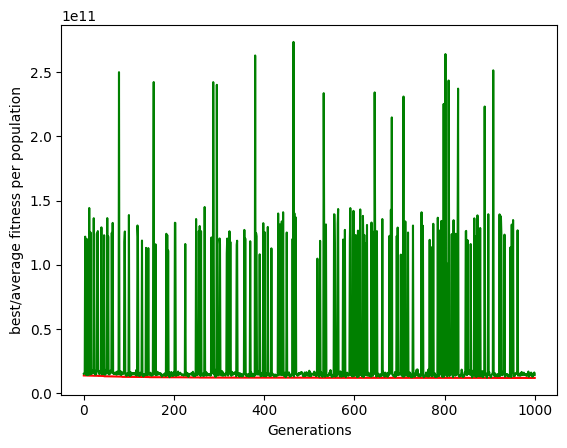

In [13]:
p_cx = 0.75
p_mut = 1 - p_cx
iteration = 1000

final_pop, logbook = algorithms.eaSimple(
    starting_pop,
    toolbox,
    p_cx,
    p_mut,
    iteration,
    stats,
    hof,
    True
)

#print(f"best solution: {hof[0]}")

plt.plot(logbook.select("min"), color='red')
plt.plot(logbook.select("avg"), color='green')
plt.xlabel('Generations')
plt.ylabel('best/average fitness per population')
plt.show()

In [14]:

description = {}
res = factory.evaluateTruckScedule(hof[0], detail_summary=description)
print(description)
print(res)
#prev 125

{'total_distance': 120854.15008416769, 'total_no_truck': 65, 'max_no_truck': 6, 'violations': 0}
12085427508.416769
